# Linear Regression Baseline

## Preprocess Data

In [1]:
import numpy as np
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath('../'))

from Models.LinearRegression import LinearRegression
from Utils.Preprocessor import Preprocessor
from Utils.Utils import root_mean_squared_error, train_test_split, initial_preprocessing

In [2]:
# Read the data
train = pd.read_csv('../Data/train.csv', index_col='Id')

In [3]:
# Remove unnecessary features based on exploratory data analysis part 1.
train = initial_preprocessing(train)

In [4]:
X = train.drop(columns=["num_wins_agent1", "num_draws_agent1", "num_losses_agent1", "utility_agent1"], axis=1)
y = train["utility_agent1"]

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
preprocessor = Preprocessor(normalize=True, standardize=False, one_hot_encode=True)

X_train_p = preprocessor.fit_transform(X_train)
X_valid_p = preprocessor.transform(X_valid)

# clip the dataset
X_train_p = X_train_p[0:50000]
y_train = y_train[0:50000]

## 1- Linear Regression

In [7]:
lr_model = LinearRegression(fit_method="ols", loss_function="rmse")
#lr_model = LinearRegression(fit_method="gd", loss_function="rmse", learning_rate=0.01, epochs=10, min_step_size=0.001, gradient_descent='batch')

lr_model.fit(X_train_p, y_train)

train_pred = lr_model.predict(X_train_p)
test_pred = lr_model.predict(X_valid_p)

print("Linear Regression: ")
print("Train mean squared error: ", root_mean_squared_error(y_train, train_pred))
print("Validation mean squared error: ", root_mean_squared_error(y_valid, test_pred))

Linear Regression: 
Train mean squared error:  0.5167697476209121
Validation mean squared error:  0.5204219226527002


## 2- Lasso Regression

In [8]:
lr_model = LinearRegression(fit_method="gd", loss_function="rmse", l1=0.01, learning_rate=0.01, epochs=10, min_step_size=0.001, gradient_descent='batch')
#lr_model = LinearRegression(fit_method="gd", loss_function="rmse", learning_rate=0.01, epochs=10, min_step_size=0.001, gradient_descent='batch')

lr_model.fit(X_train_p, y_train)

train_pred = lr_model.predict(X_train_p)
test_pred = lr_model.predict(X_valid_p)

print("Linear Regression: ")
print("Train mean squared error: ", root_mean_squared_error(y_train, train_pred))
print("Validation mean squared error: ", root_mean_squared_error(y_valid, test_pred))

Linear Regression: 
Train mean squared error:  0.622591619632271
Validation mean squared error:  0.6236378744441864


## 3- Ridge Regression

In [9]:
lr_model = LinearRegression(fit_method="ols", loss_function="rmse", l2=0.01)
#lr_model = LinearRegression(fit_method="gd", loss_function="rmse", learning_rate=0.01, epochs=10, min_step_size=0.001, gradient_descent='batch')

lr_model.fit(X_train_p, y_train)

train_pred = lr_model.predict(X_train_p)
test_pred = lr_model.predict(X_valid_p)

print("Linear Regression: ")
print("Train mean squared error: ", root_mean_squared_error(y_train, train_pred))
print("Validation mean squared error: ", root_mean_squared_error(y_valid, test_pred))

Linear Regression: 
Train mean squared error:  0.5174035508254986
Validation mean squared error:  0.520766358358823


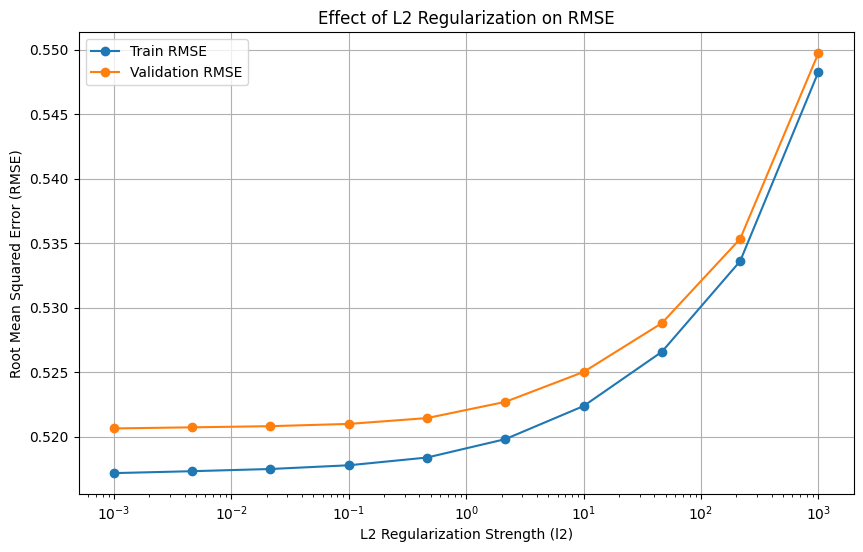

In [10]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define a function to compute RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Define L2 regularization values to test
l2_values = np.logspace(-3, 3, 10)  # From 0.001 to 1000 on a log scale
train_errors = []
validation_errors = []

# Iterate over different L2 regularization values
for l2 in l2_values:
    # Create and train the model with the current L2 value
    lr_model = LinearRegression(fit_method="ols", loss_function="rmse", l2=l2)
    lr_model.fit(X_train_p, y_train)

    # Predict on training and validation sets
    train_pred = lr_model.predict(X_train_p)
    test_pred = lr_model.predict(X_valid_p)

    # Calculate RMSE for training and validation sets
    train_rmse = root_mean_squared_error(y_train, train_pred)
    validation_rmse = root_mean_squared_error(y_valid, test_pred)

    # Store errors for plotting
    train_errors.append(train_rmse)
    validation_errors.append(validation_rmse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(l2_values, train_errors, label='Train RMSE', marker='o')
plt.plot(l2_values, validation_errors, label='Validation RMSE', marker='o')
plt.xscale('log')
plt.xlabel('L2 Regularization Strength (l2)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Effect of L2 Regularization on RMSE')
plt.legend()
plt.grid(True)
plt.show()